In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DC_Properties.csv')

data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
data["SOURCE"] = "Residential"
data["QUALIFIED"] = 'Q'
data_limited = data[(data['STORIES'] < 6) & (data['PRICE'] >99999) & (data['PRICE'] <5001000) & (data['SALEDATE'] > '2013-07-01')]

data_viz = data_limited.drop(['NUM_UNITS','AYB','YR_RMDL','SALE_NUM','BLDG_NUM','GIS_LAST_MOD_DTTM','CMPLX_NUM','LIVING_GBA','NATIONALGRID'], axis=1)

data_ml = data_limited.drop(['HEAT','NUM_UNITS','AYB','YR_RMDL','SALE_NUM','BLDG_NUM','GIS_LAST_MOD_DTTM','CMPLX_NUM','LIVING_GBA','CITY',
                    'STATE','NATIONALGRID','FULLADDRESS','ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','CENSUS_TRACT','CENSUS_BLOCK',
                    'WARD','SQUARE','X','Y','SOURCE','QUALIFIED','Unnamed: 0','LATITUDE','LONGITUDE', 'STYLE'], axis=1)

In [5]:
encoding = {'GRADE':{'Very Good':4, 'Above Average':6, 'Good Quality':3, 'Excellent':8, 'Average':5, 'Superior':7,
                     'Fair Quality':2, 'Exceptional-D':12, 'Exceptional-C':11, 'Low Quality':1, 'Exceptional-A':9,
                     'Exceptional-B':10, 'No Data':0},
            'CNDTN':{'Good':4, 'Very Good':5, 'Average':3, 'Fair':2, 'Excellent':6, 'Poor':1, 'Default':0}}

data_ml.replace(encoding, inplace=True)

data_ml

,BATHRM,HF_BATHRM,AC,ROOMS,BEDRM,EYB,STORIES,SALEDATE,PRICE,GBA,...,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,QUADRANT
2,3,1,Y,9,5,1984,3.0,2016-06-21 00:00:00,2100000.0,2522.0,...,5,Common Brick,Built Up,Hardwood,2.0,4,24,1680,20009.0,NW
8,3,1,Y,7,3,1967,2.0,2018-05-03 00:00:00,1430000.0,1488.0,...,5,Common Brick,Built Up,Hardwood,2.0,1,24,1424,20009.0,NW
29,3,1,Y,11,3,1984,3.0,2013-12-11 00:00:00,1210000.0,2520.0,...,5,Common Brick,Built Up,Hardwood,2.0,3,11,1853,20009.0,NW
41,3,1,Y,9,4,1967,3.0,2016-09-14 00:00:00,1550000.0,2552.0,...,5,Common Brick,Metal- Sms,Hardwood,2.0,2,24,1853,20009.0,NW
42,3,1,Y,9,4,1967,3.0,2015-09-16 00:00:00,1599900.0,2520.0,...,4,Common Brick,Built Up,Hardwood,2.0,2,24,1853,20009.0,NW
43,3,1,Y,13,4,1967,3.0,2018-03-30 00:00:00,1700000.0,2382.0,...,6,Common Brick,Metal- Sms,Hardwood,2.0,3,24,1853,20009.0,NW
44,3,2,Y,10,4,1967,3.0,2017-05-01 00:00:00,1700000.0,2520.0,...,5,Common Brick,Built Up,Hardwood,2.0,2,24,1853,20009.0,NW
62,4,2,Y,11,5,1978,4.0,2014-03-05 00:00:00,1599000.0,3162.0,...,4,Common Brick,Built Up,Hardwood/Carp,3.0,0,24,950,20009.0,NW
72,4,2,Y,8,3,1964,2.0,2014-10-08 00:00:00,993500.0,1148.0,...,5,Common Brick,Built Up,Hardwood,1.0,1,11,814,20009.0,NW
78,2,1,Y,11,4,1990,2.0,2013-10-30 00:00:00,1155000.0,1380.0,...,5,Common Brick,Built Up,Hardwood,2.0,2,24,1183,20009.0,NW


In [6]:
data_ml_dummy = pd.get_dummies(data_ml, columns=['AC','STRUCT','EXTWALL','ROOF','INTWALL','USECODE','ZIPCODE','QUADRANT'])
data_ml_dummy

,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,STORIES,SALEDATE,PRICE,GBA,GRADE,...,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20036.0,ZIPCODE_20037.0,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
2,3,1,9,5,1984,3.0,2016-06-21 00:00:00,2100000.0,2522.0,4,...,0,0,0,0,0,0,0,1,0,0
8,3,1,7,3,1967,2.0,2018-05-03 00:00:00,1430000.0,1488.0,6,...,0,0,0,0,0,0,0,1,0,0
29,3,1,11,3,1984,3.0,2013-12-11 00:00:00,1210000.0,2520.0,6,...,0,0,0,0,0,0,0,1,0,0
41,3,1,9,4,1967,3.0,2016-09-14 00:00:00,1550000.0,2552.0,6,...,0,0,0,0,0,0,0,1,0,0
42,3,1,9,4,1967,3.0,2015-09-16 00:00:00,1599900.0,2520.0,6,...,0,0,0,0,0,0,0,1,0,0
43,3,1,13,4,1967,3.0,2018-03-30 00:00:00,1700000.0,2382.0,6,...,0,0,0,0,0,0,0,1,0,0
44,3,2,10,4,1967,3.0,2017-05-01 00:00:00,1700000.0,2520.0,6,...,0,0,0,0,0,0,0,1,0,0
62,4,2,11,5,1978,4.0,2014-03-05 00:00:00,1599000.0,3162.0,8,...,0,0,0,0,0,0,0,1,0,0
72,4,2,8,3,1964,2.0,2014-10-08 00:00:00,993500.0,1148.0,5,...,0,0,0,0,0,0,0,1,0,0
78,2,1,11,4,1990,2.0,2013-10-30 00:00:00,1155000.0,1380.0,5,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data_ml_dummy.to_csv('Clean_DC_data.csv')

In [8]:
data_ml_dummy['SALEDATE']=pd.to_datetime(data_ml_dummy['SALEDATE']).dt.year
data_ml_dummy = data_ml_dummy.dropna()

In [9]:
X = data_ml_dummy.drop('PRICE', axis=1).values
y = data_ml_dummy["PRICE"].values.reshape(-1, 1)

print(X.shape, y.shape)

(21614, 102) (21614, 1)


In [10]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.svm import NuSVR, LinearSVR

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# for n in range(2, 31, 2):
#     pca = PCA(n_components=n)

#     pca.fit(X_train_scaled)

#     X_train_pca = pca.transform(X_train)
#     X_test_pca = pca.transform(X_test)
    
#     print(n)
#     modelMaker(df_ml_dummy, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(), NuSVR(), LinearSVR()])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
def modelMaker(df, target, models, scale = True, dummy = True, rs = 42):
    global X_train_pca, X_test_pca, y_train, y_test
    try:
        assert len(models) > 0

    except:
        models = [models]

    for model in models:
        print("Fitting "+str(model).split("(")[0])

        print("R^2: "+ str((X_test, y_test)))
        
        for n in range(2, 41, 2):
            pca = PCA(n_components=n)

            # note, y is optional here
            pca.fit(X_train_scaled)
            X_train_pca=pca.transform(X_train_scaled)
            X_test_pca =pca.transform(X_test_scaled)
            model.fit(X_train_pca, y_train)

            print()
            print("n: "+ str(n))

            print("R^2: "+ str(model.score(X_test_pca, y_test)))
            
modelMaker(data_ml_dummy, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(), NuSVR(), LinearSVR()])

Fitting LinearRegression
R^2: (array([[1., 0., 4., ..., 0., 1., 0.],
       [1., 0., 6., ..., 0., 0., 0.],
       [1., 1., 6., ..., 0., 1., 0.],
       ...,
       [2., 1., 6., ..., 0., 0., 0.],
       [1., 1., 6., ..., 1., 0., 0.],
       [2., 1., 9., ..., 0., 0., 0.]]), array([[ 308000.],
       [ 515000.],
       [ 636000.],
       ...,
       [ 499000.],
       [ 449000.],
       [1300000.]]))

n: 2
R^2: 0.44338109131337045

n: 4
R^2: 0.6097107994187878

n: 6
R^2: 0.6177235360018929

n: 8
R^2: 0.6207615156138099

n: 10
R^2: 0.6399795502444506

n: 12
R^2: 0.6767620986431612

n: 14
R^2: 0.6881399132823773

n: 16
R^2: 0.6909156101423202

n: 18
R^2: 0.7082717247604868

n: 20
R^2: 0.7128471550770736

n: 22
R^2: 0.7016906872814301

n: 24
R^2: 0.7072036080694033

n: 26
R^2: 0.7084990651070442

n: 28
R^2: 0.7014643373470878

n: 30
R^2: 0.7187769165828299

n: 32
R^2: 0.7241439129526781

n: 34
R^2: 0.7292148946458297

n: 36
R^2: 0.722421736765539

n: 38
R^2: 0.730058540714714

n: 40
R^2: 0.7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 2
R^2: -0.03412260262106992


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 4
R^2: -0.03443845635325071


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 6
R^2: -0.03460436448828097


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 8
R^2: -0.03457206050320005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 10
R^2: -0.03467578725521281


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 12
R^2: -0.03469575495776711


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 14
R^2: -0.03473471758650071


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 16
R^2: -0.034759444847511256


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 18
R^2: -0.034735040409915596


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 20
R^2: -0.034705236603485456


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 22
R^2: -0.034720458647014674


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 24
R^2: -0.0346979530232181


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 26
R^2: -0.03469542613746346


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 28
R^2: -0.03464287017221279


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 30
R^2: -0.0346320068240944


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 32
R^2: -0.03461599340242727


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 34
R^2: -0.03458833643433401


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 36
R^2: -0.03457055113267571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 38
R^2: -0.03456406685632607


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



n: 40
R^2: -0.03452914613779012
Fitting LinearSVR
R^2: (array([[1., 0., 4., ..., 0., 1., 0.],
       [1., 0., 6., ..., 0., 0., 0.],
       [1., 1., 6., ..., 0., 1., 0.],
       ...,
       [2., 1., 6., ..., 0., 0., 0.],
       [1., 1., 6., ..., 1., 0., 0.],
       [2., 1., 9., ..., 0., 0., 0.]]), array([[ 308000.],
       [ 515000.],
       [ 636000.],
       ...,
       [ 499000.],
       [ 449000.],
       [1300000.]]))

n: 2
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 4
R^2: -1.8760641493829326

n: 6
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 8
R^2: -1.8760641493829326

n: 10
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 12
R^2: -1.8760641493829326

n: 14
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 16
R^2: -1.8760641493829326

n: 18
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 20
R^2: -1.8760641493829326

n: 22
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 24
R^2: -1.8760641493829326

n: 26
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 28
R^2: -1.8760641493829326

n: 30
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 32
R^2: -1.8760641493829326

n: 34
R^2: -1.8760641493829326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



n: 36
R^2: -1.8760641493829326

n: 38


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2: -1.8760641493829326

n: 40
R^2: -1.8760641493829326


In [12]:
# def modelMaker(df, target, models, scale = True, dummy = True, rs = 42):
#     global X_train_pca, X_test_pca, y_train, y_test
    
#     try:
#         assert len(models) > 0
#     except:
#         models = [models]
    
#     for model in models:
#         print("Fitting "+str(model).split("(")[0])
#         model.fit(X_train_pca, y_train)
#         print("R^2: "+ str(model.score(X_test_pca, y_test)))

In [13]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data_ml_dummy["ROOMS"].values.reshape(-1, 1)
y = data_ml_dummy["PRICE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (21614, 1) (21614, 1)


Text(0, 0.5, 'Price')

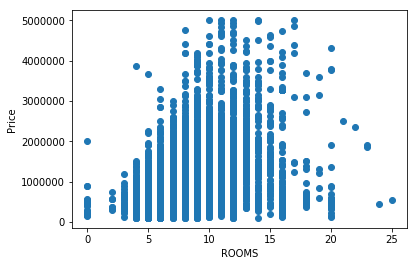

In [14]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("ROOMS")
plt.ylabel("Price")

In [15]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data_ml_dummy["BATHRM"].values.reshape(-1, 1)
y = data_ml_dummy["PRICE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (21614, 1) (21614, 1)


In [ ]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Bathrooms")
plt.ylabel("Price")

In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data_ml_dummy["GBA"].values.reshape(-1, 1)
y = data_ml_dummy["PRICE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Gross Building Area")
plt.ylabel("Price")

In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data_ml_dummy["CNDTN"].values.reshape(-1, 1)
y = data_ml_dummy["PRICE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Building Condition")
plt.ylabel("Price")

In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data_ml_dummy["QUADRANT_NW"].values.reshape(-1, 1)
y = data_ml_dummy["PRICE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("NE QUADRANT")
plt.ylabel("Price")

In [ ]:
X_train_scaled[:,0].reshape(-1,1).shape

In [ ]:
y_train.shape

In [ ]:
reg = LinearRegression()
for i in range(len(X_train_scaled[0])):
    reg.fit(X_train_scaled[:,i].reshape(-1,1),y_train)
    pred = reg.predict(X_test_scaled[:,i].reshape(-1,1))
    plt.scatter(X_test_scaled[:,i].reshape(-1,1), y_test)
    plt.plot(X_test_scaled[:,i].reshape(-1,1), pred, color="red")
    plt.show()

In [ ]:
reg.fit(X_train_scaled[:,0].reshape(-1,1),y_train)
pred = reg.predict(X_test_scaled[:,0].reshape(-1,1))

In [ ]:
plt.scatter(X_test_scaled[:,7].reshape(-1,1), y_test)
plt.scatter(X_test_scaled[:,7].reshape(-1,1), pred, color="red")
plt.title("Zip Code 20016 (Highest Zip Avg. Sell Price) vs. Price")
plt.savefig("ZIPCODE_20016_vs_Price.jpg")

In [ ]:
# to the extent that the red/predicted dots cover the blue y_test dots, we have a strong predictor
reg = LinearRegression()
for i in range(1,len(X_train_scaled[0])):
    reg.fit(X_train_scaled[:,:i],y_train)
    pred = reg.predict(X_test_scaled[:,:i])
    plt.scatter(X_test_scaled[:,i], y_test)
    plt.scatter(X_test_scaled[:,i], pred,color="red")
    plt.title(i)
    plt.show()

In [ ]:
# this printout shows there is still a problem with the predicted value
# commenting out line #7 and reinstating line 6 seems to show normal dat for y_test
reg.fit(X_train_scaled[:,:115],y_train)
pred = reg.predict(X_test_scaled[:,:115])
pred = np.delete(pred,[1535])
#plt.plot([X for X in range(len(pred))],y_test,color="blue")
plt.plot([X for X in range(len(pred))],pred,color="red")

In [ ]:
print(y_test[11:20],pred[11:20])
print(max(y_test),max(pred))
print(list(y_test).index(max(y_test)))
print(list(pred).index(max(pred)))

In [ ]:
print(X_test[1535])
print(X_test_scaled[1535])